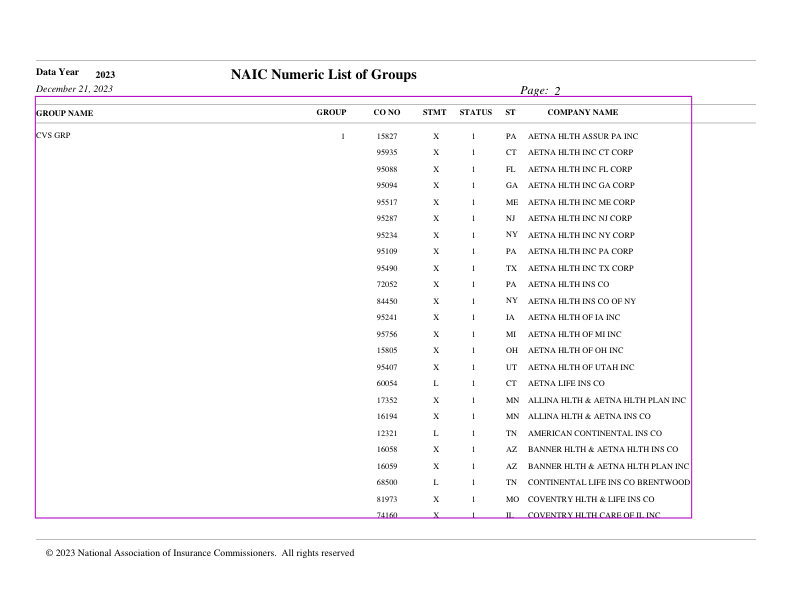

Could not find tables on ../evals/data/tables/H3_Scorecard_Mock.pdf


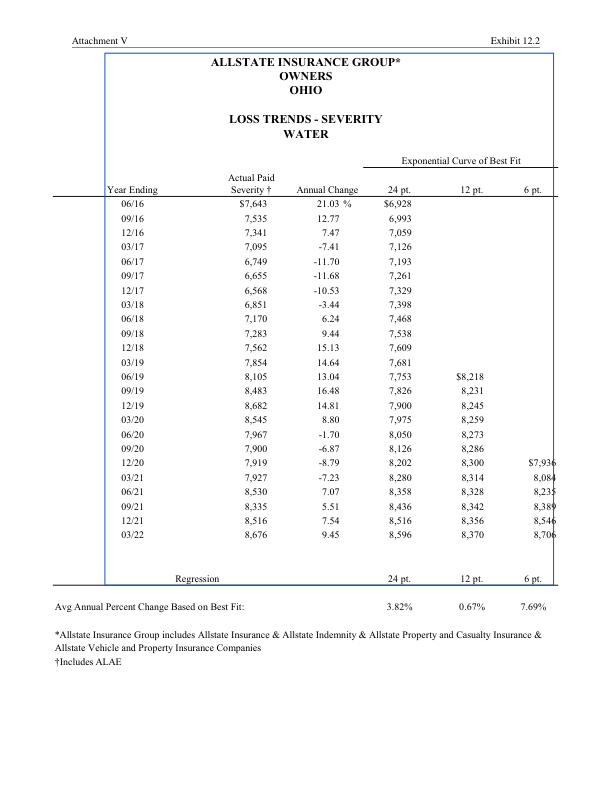

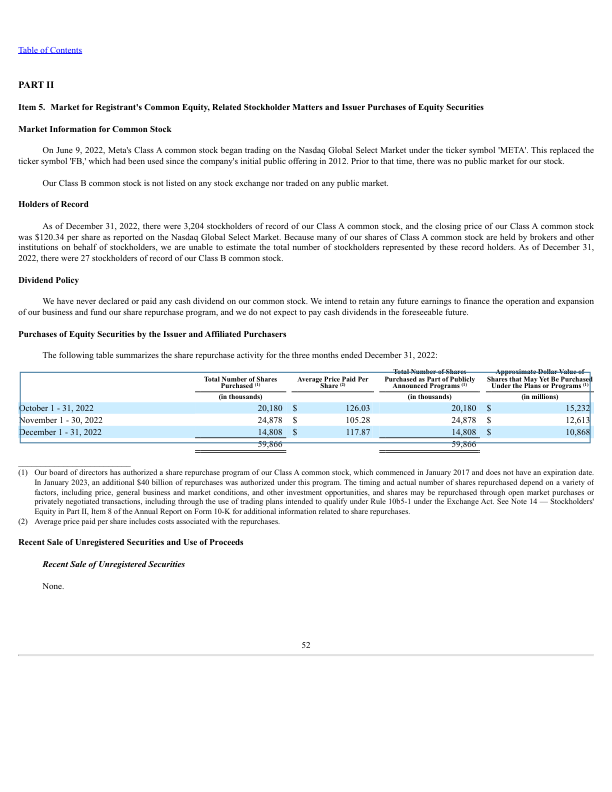

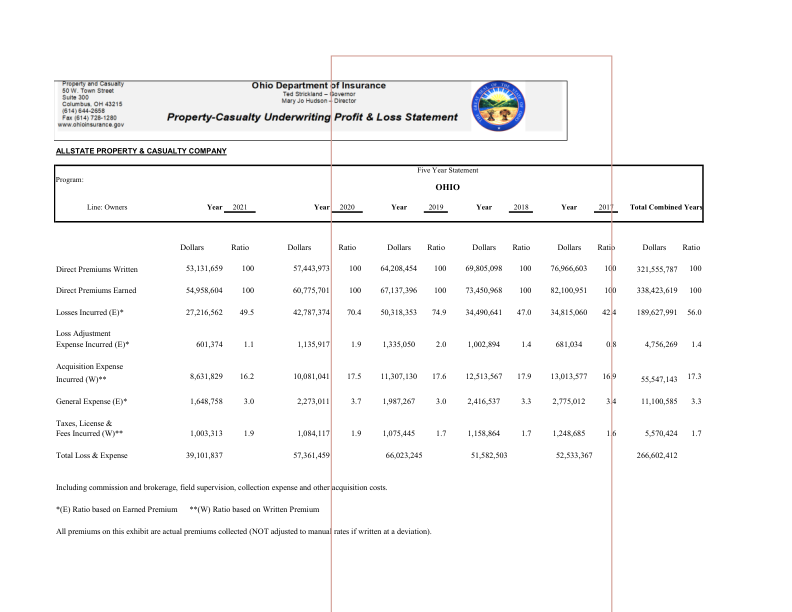

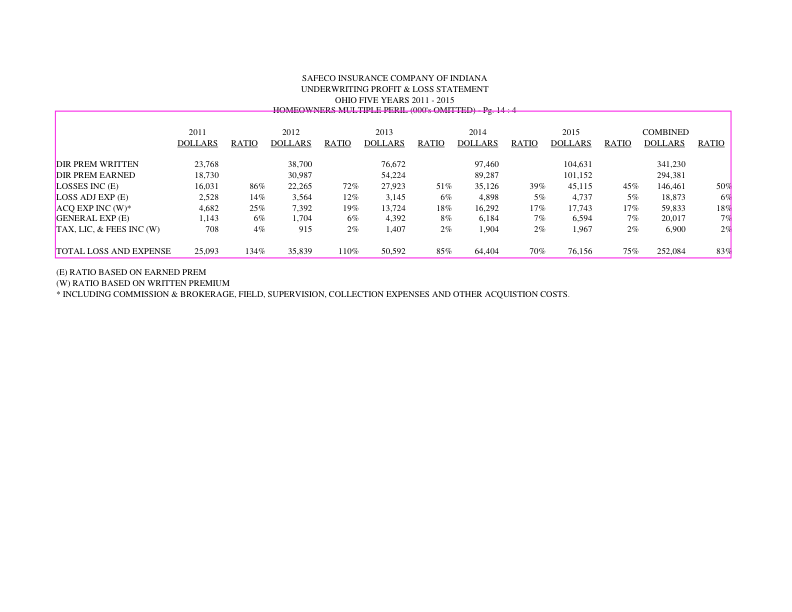

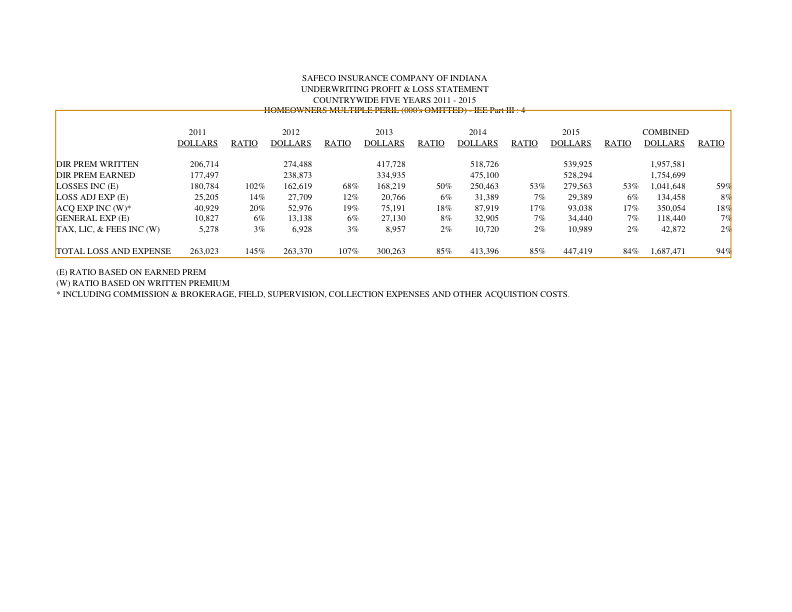

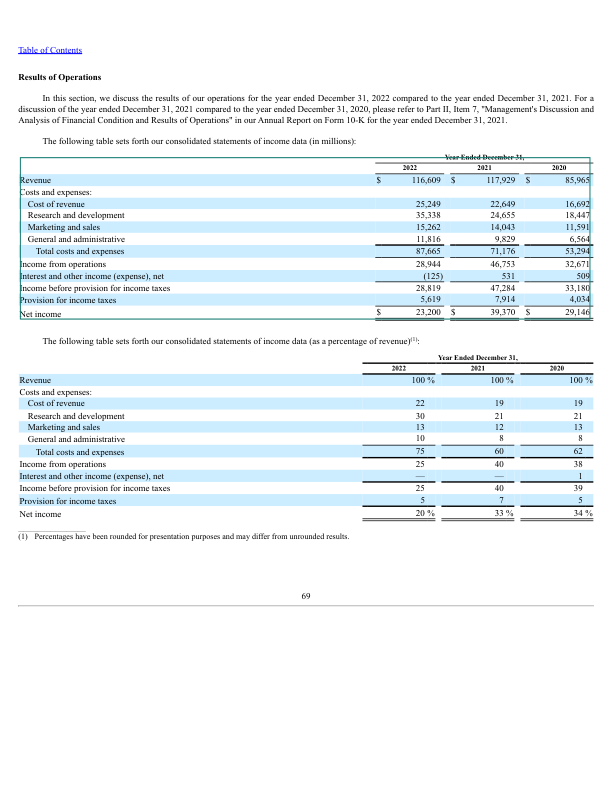

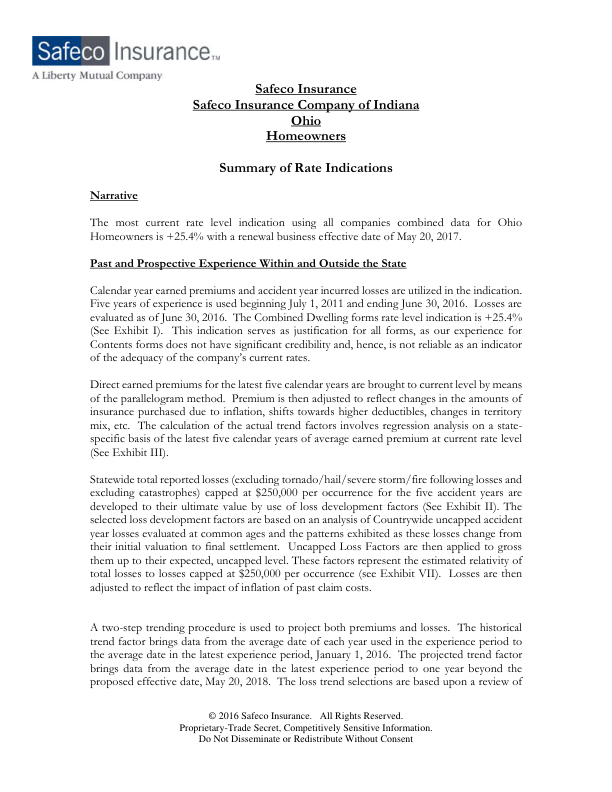

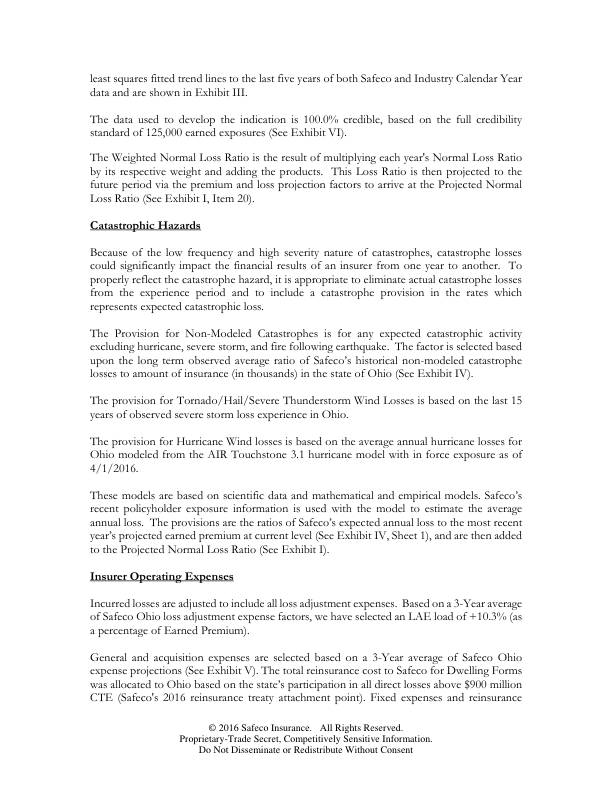

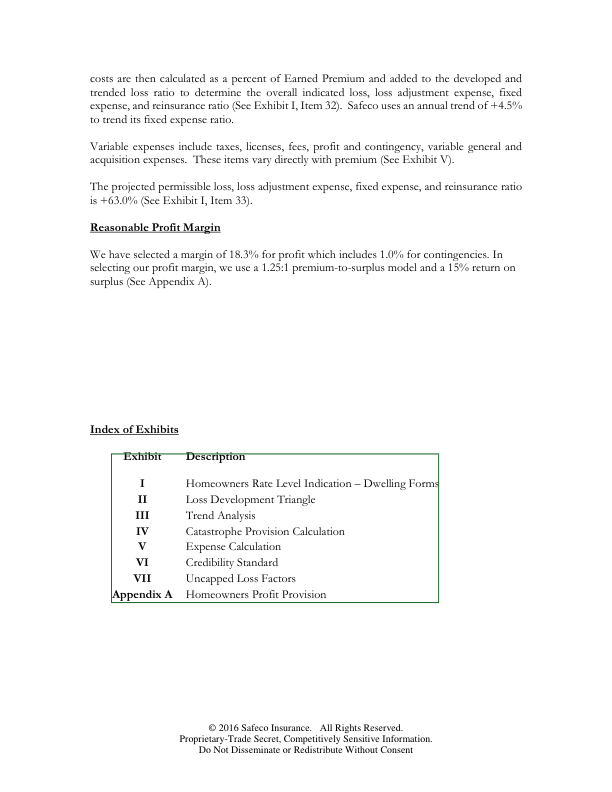

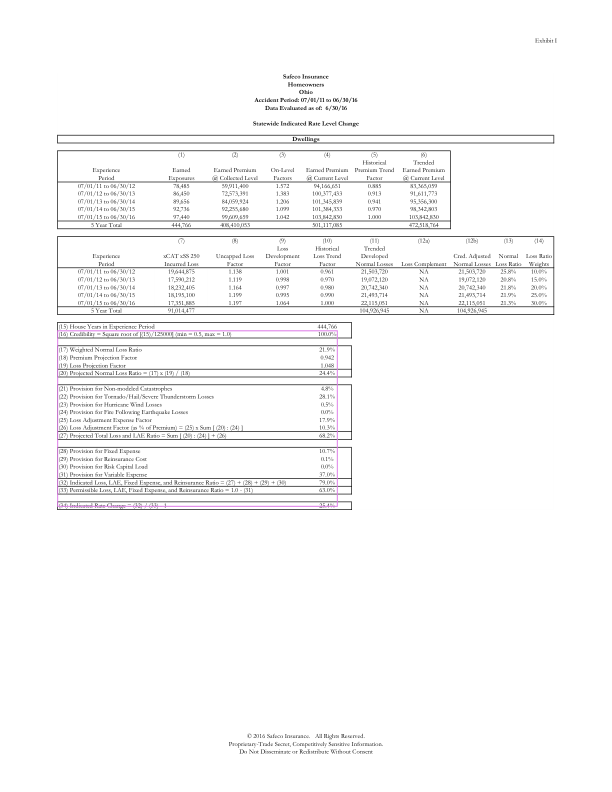

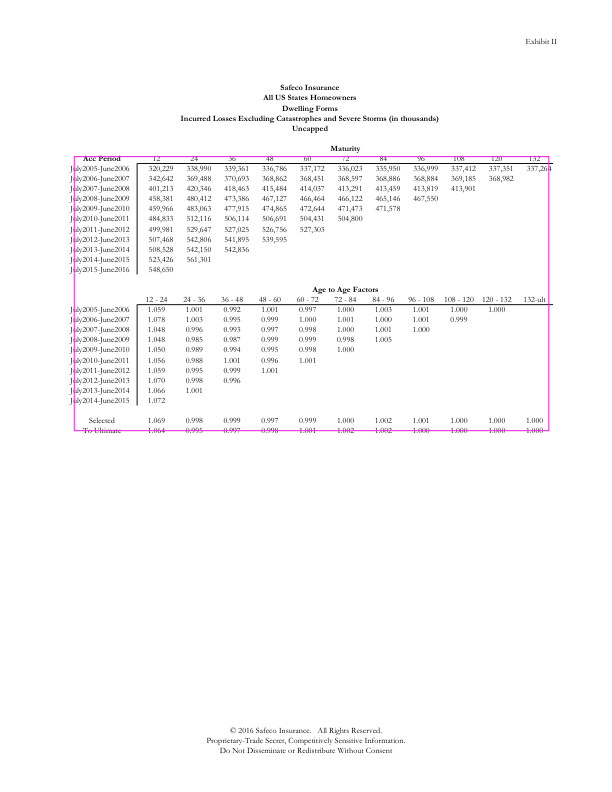

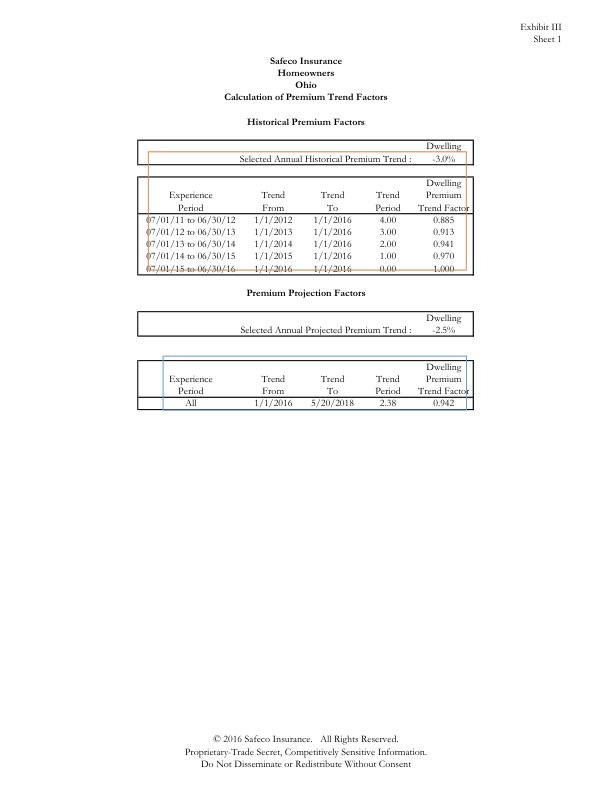

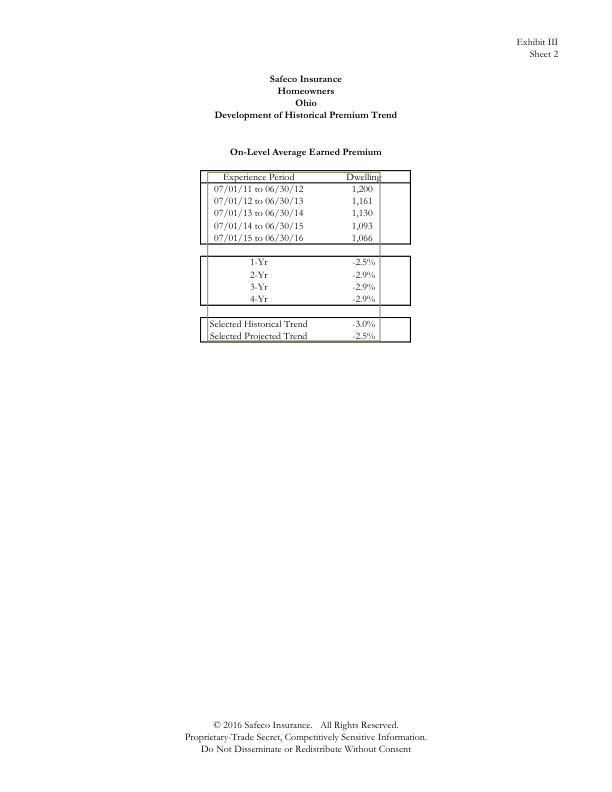

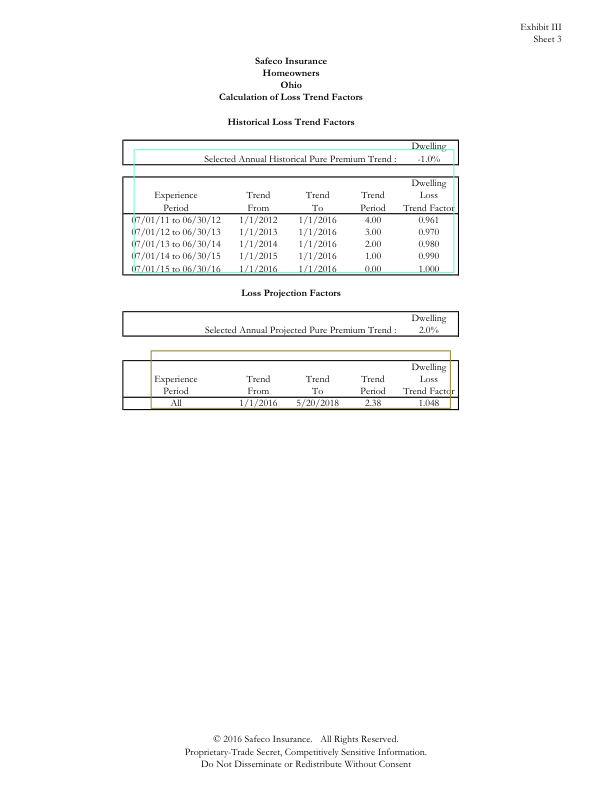

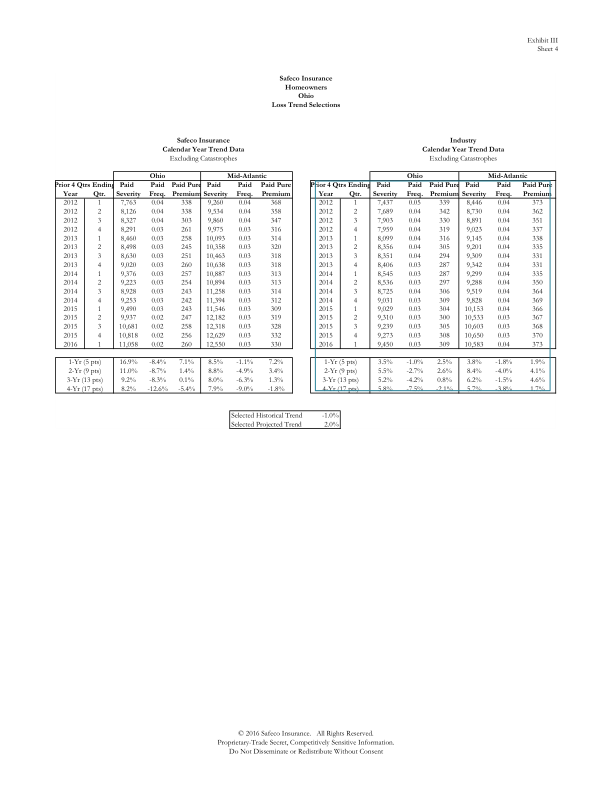

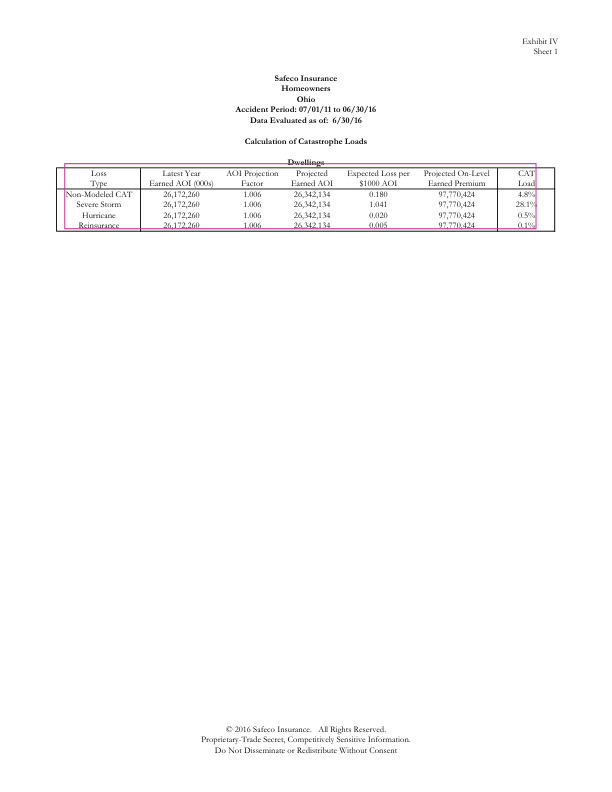

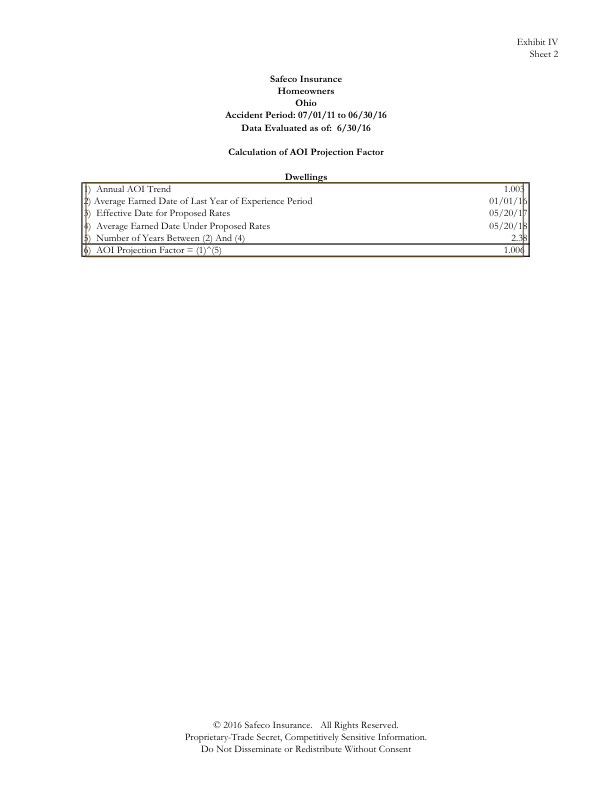

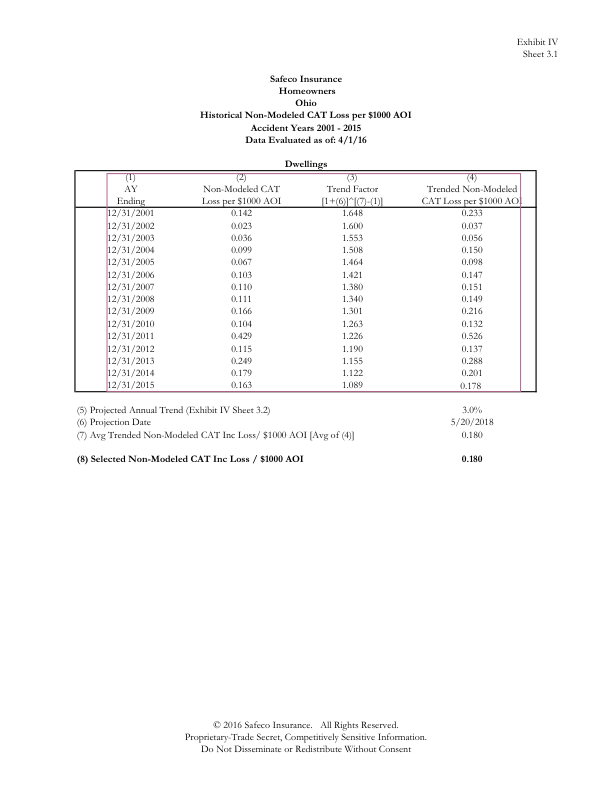

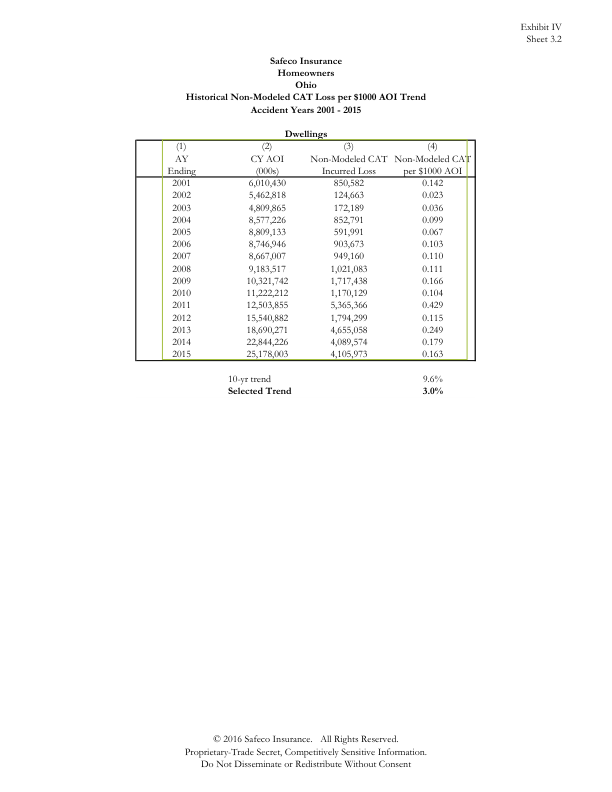

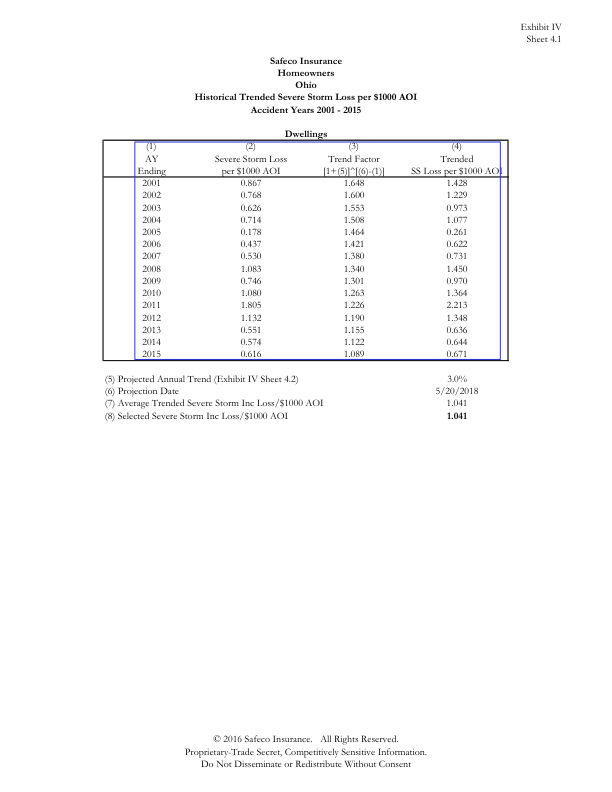

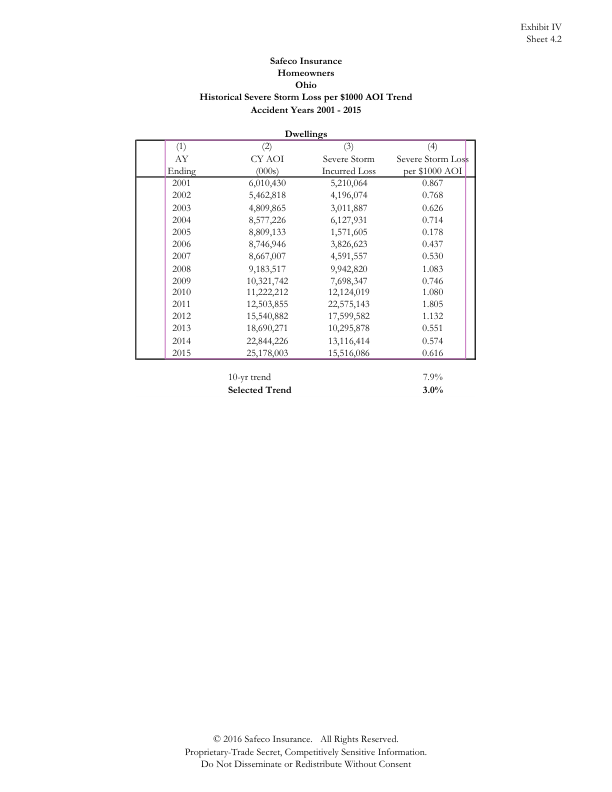

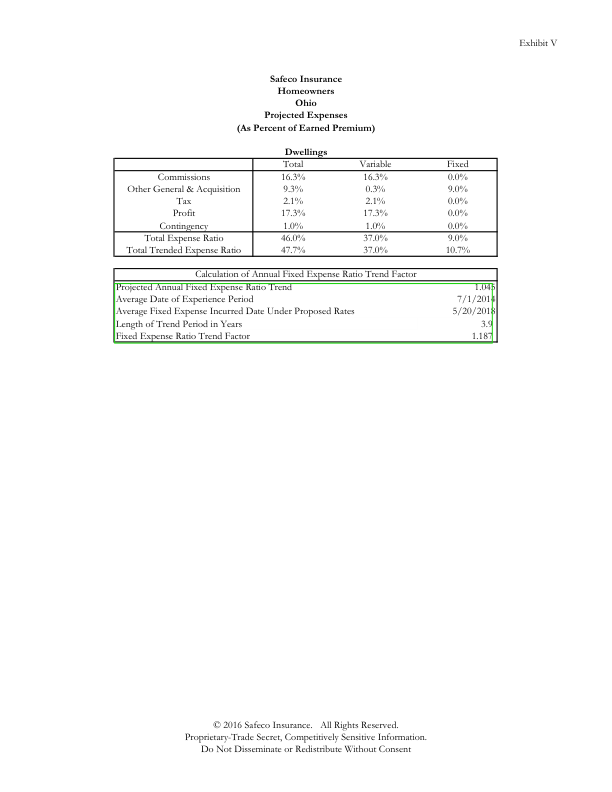

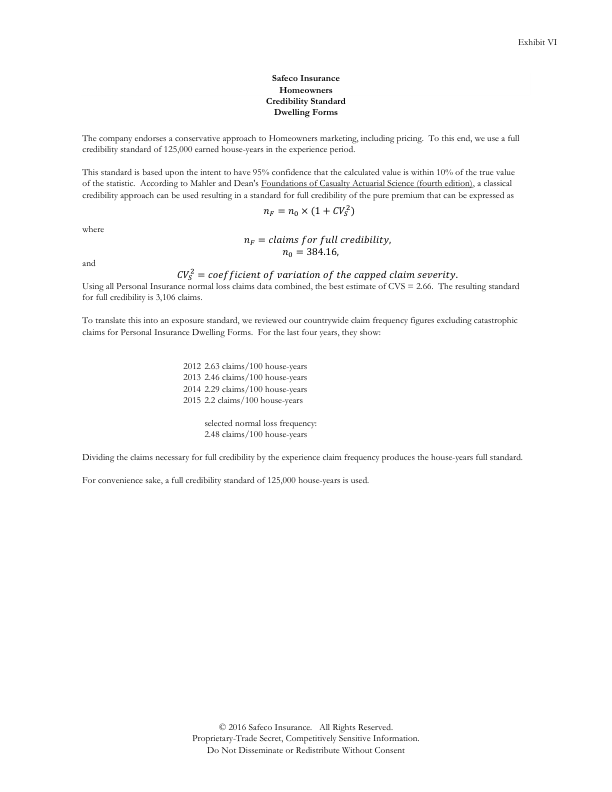

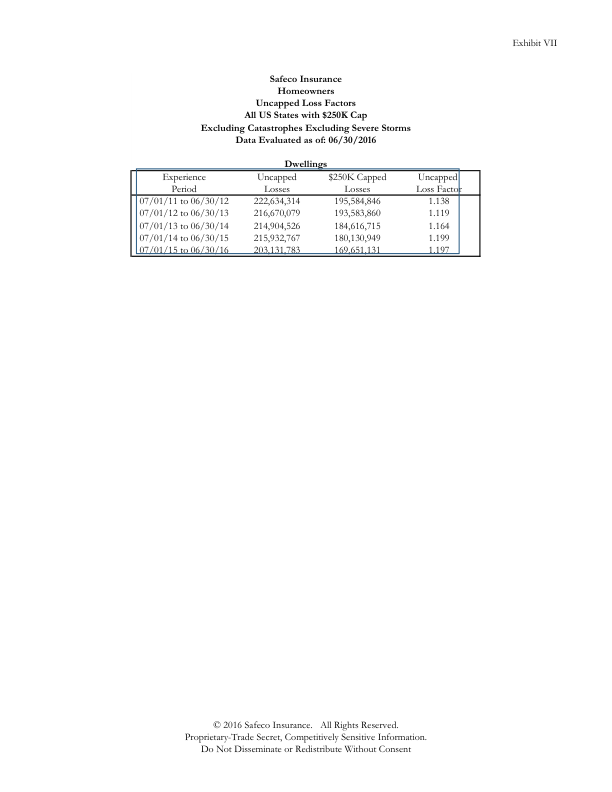

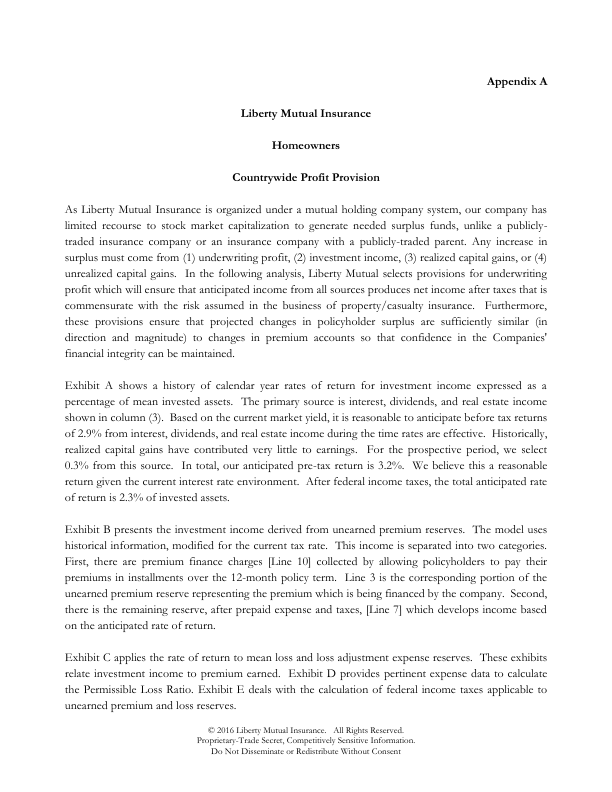

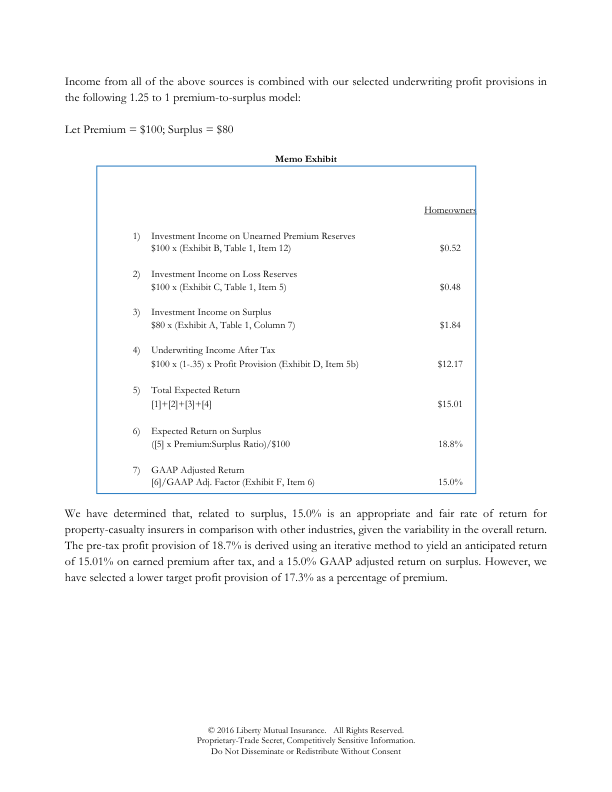

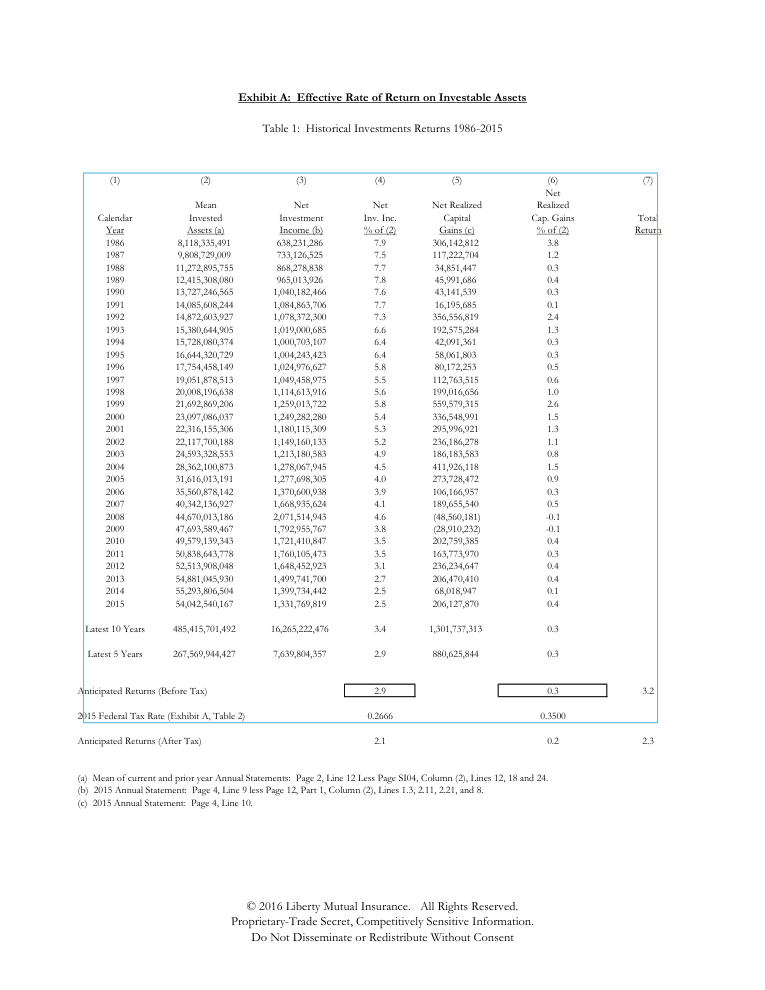

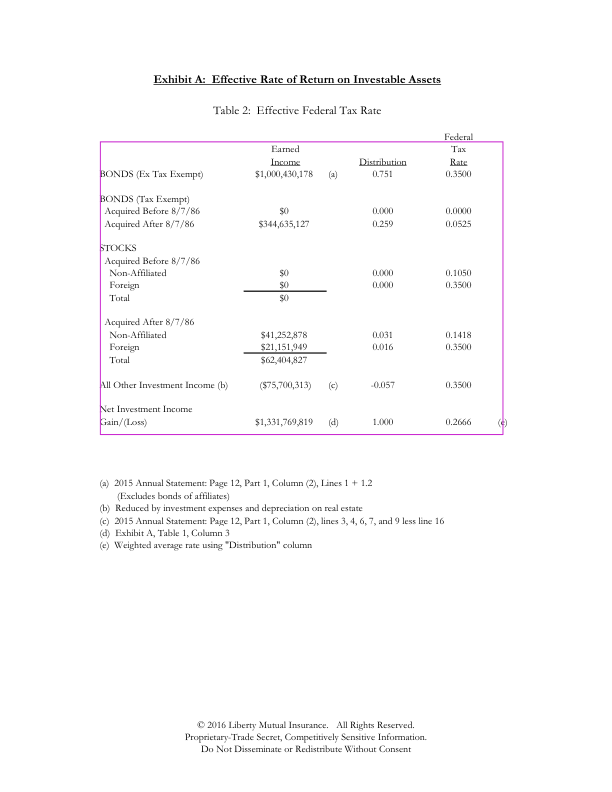

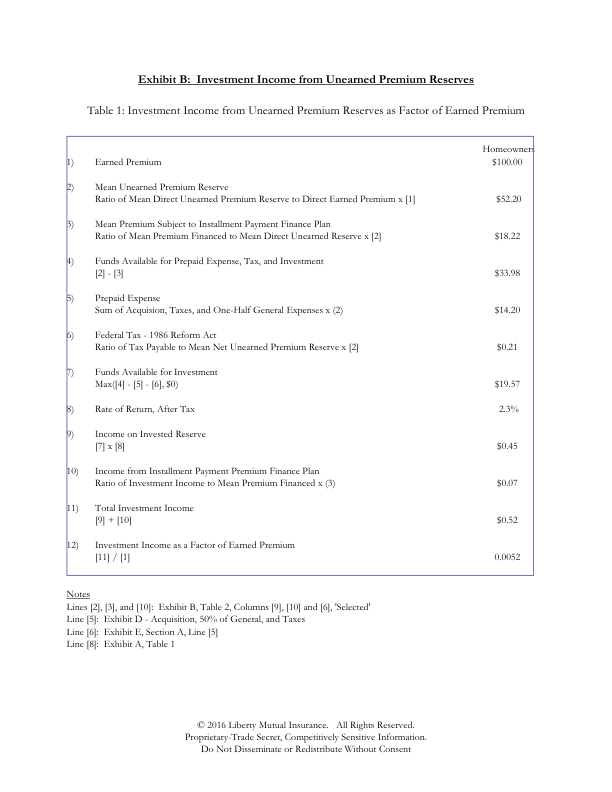

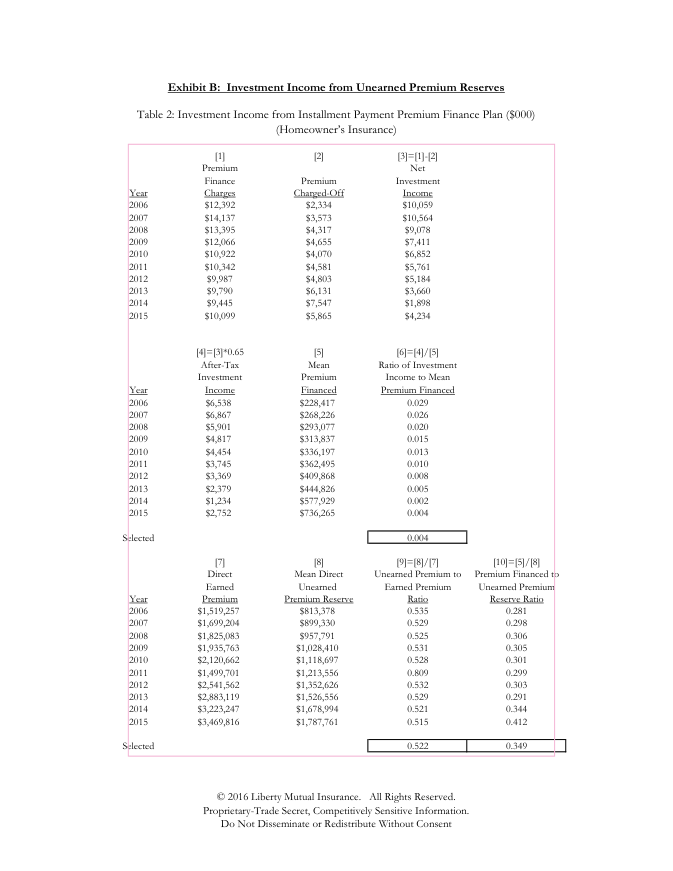

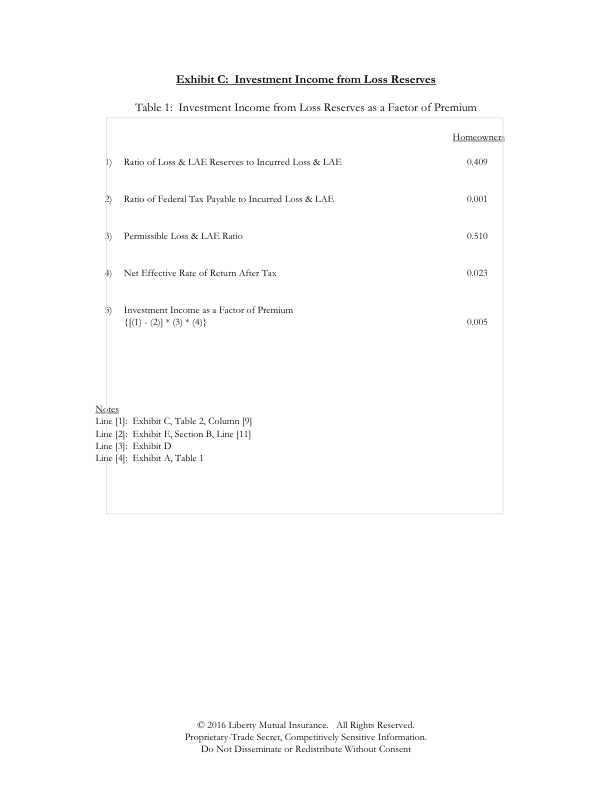

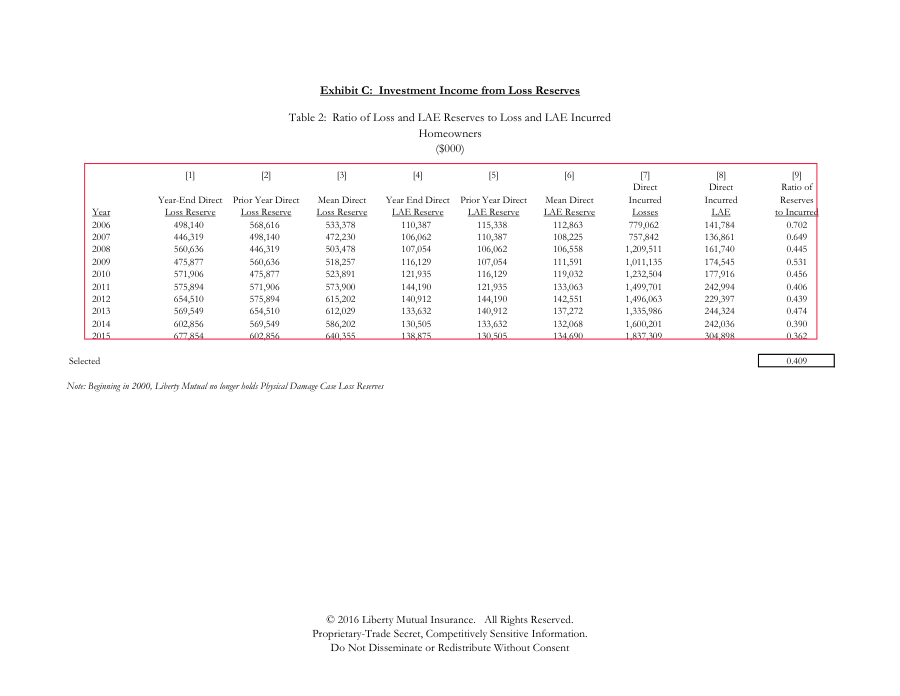

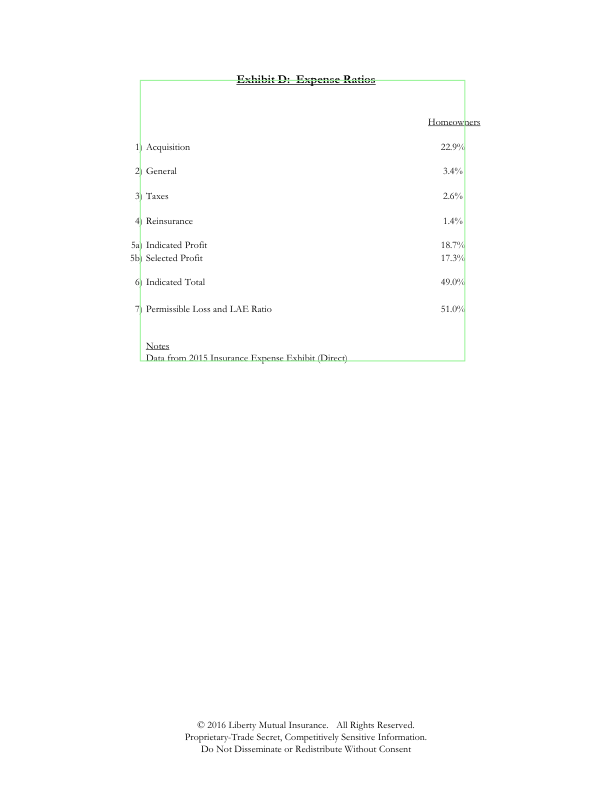

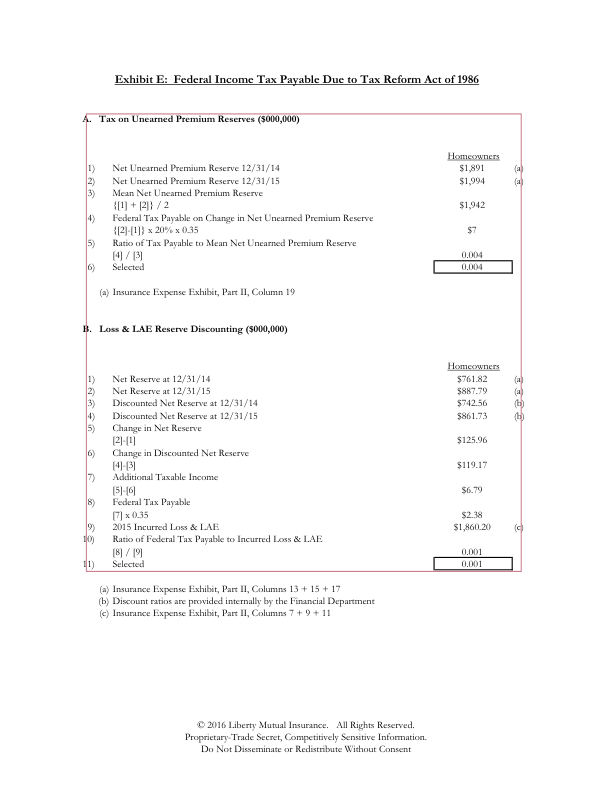

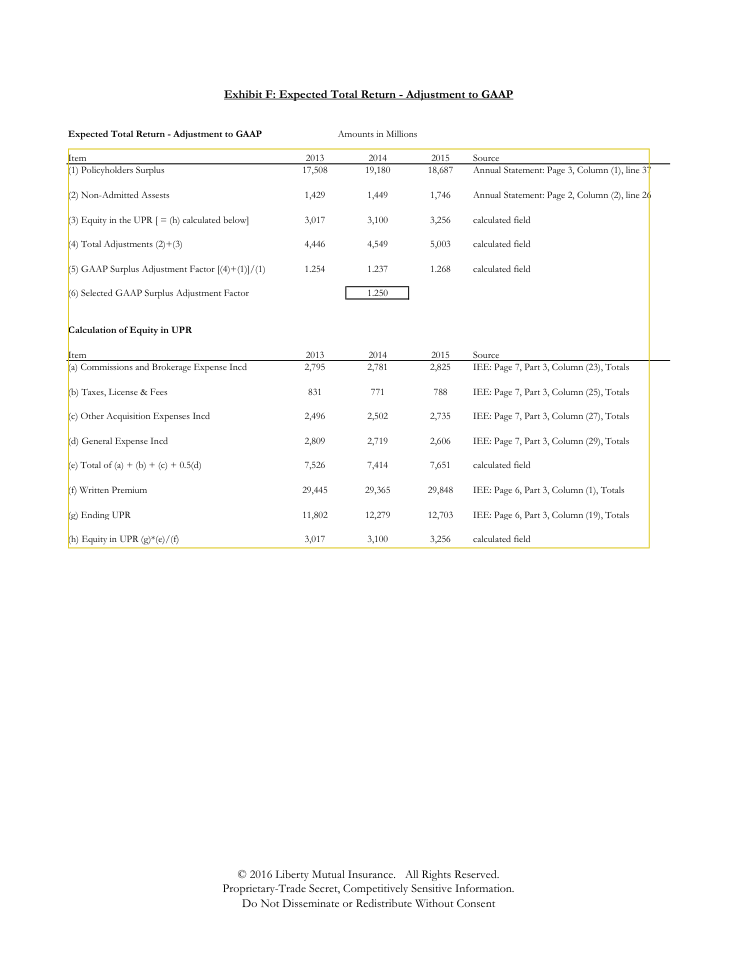

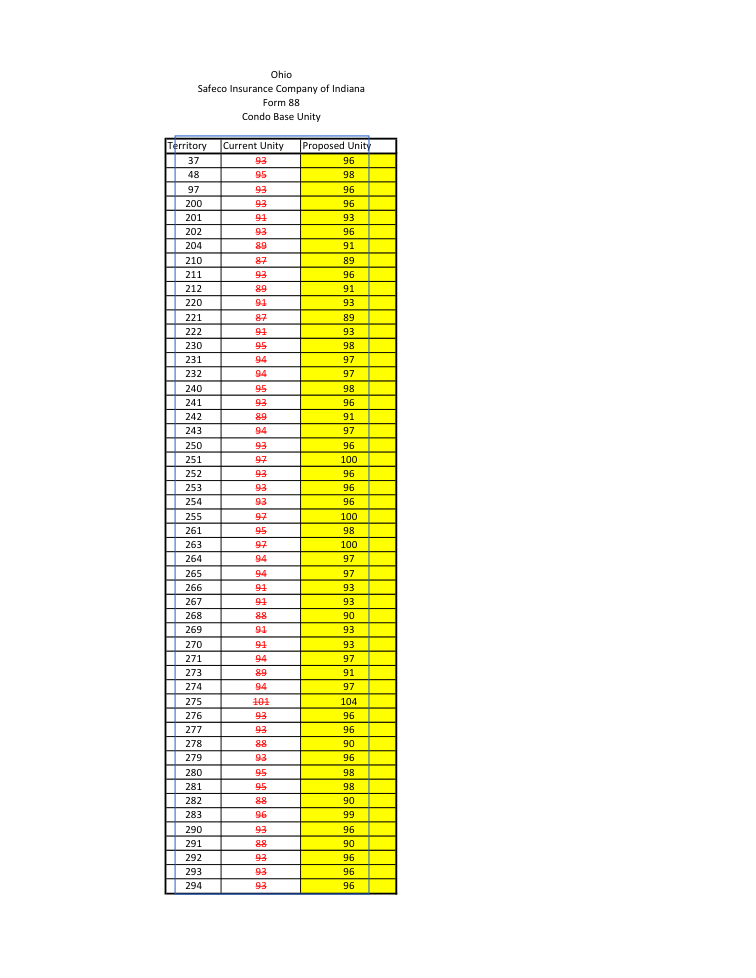

In [2]:
import sys
from pathlib import Path

sys.path.append("..")

import openparse

pdfs_with_tables_dir = Path("../evals/data/tables")

for pdf_path in pdfs_with_tables_dir.glob("*"):
    parser = openparse.DocumentParser(
        table_args={
            "parsing_algorithm": "unitable",
            "min_table_confidence": 0.8,
        },
        processing_pipeline=[],  # don't want any processing
    )
    parsed_nodes = parser.parse(pdf_path)
    table_nodes = [node for node in parsed_nodes.nodes if "table" in node.variant]

    if not table_nodes:
        print(f"Could not find tables on {pdf_path}")
        continue

    doc = openparse.Pdf(file=pdf_path)
    doc.display_with_bboxes(table_nodes)